# Python perfectionnement

In [1]:
# inclus dans python)
import decimal, fractions
import re
import statistics 
# scientific python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
print('coucou')

coucou


## Données de Python

### Valeurs numériques

#### Les entiers: int

In [3]:
nombrePersonnes = 5 
nombrePersonnes

5

In [4]:
type(nombrePersonnes)

int

In [5]:
compteur = 12300000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001
compteur + 1

12300000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000002

#### Les nombres flottants: float (IEEE754)
64 bits (ou 32 si architecture 32 bits)

In [6]:
price = 0.1
bigDistance = 2.5E300
smallDistance = 1.25E-300
price, bigDistance, smallDistance

(0.1, 2.5e+300, 1.25e-300)

In [7]:
# bigDistance**2 # OverflowError
infDistance = bigDistance*1E10
infDistance

inf

In [8]:
infDistance * 3

inf

In [9]:
infDistance * -1

-inf

In [10]:
infDistance / infDistance

nan

#### autres types numériques
- complex
- decimal
- fractions

In [11]:
n = 1 + 3j
print(n, type(n))

(1+3j) <class 'complex'>


In [12]:
1j**2

(-1+0j)

In [13]:
price, 2*price, 3*price

(0.1, 0.2, 0.30000000000000004)

In [14]:
priceD = decimal.Decimal('0.1')
priceD, 2*priceD, 3*priceD

(Decimal('0.1'), Decimal('0.2'), Decimal('0.3'))

In [15]:
print(priceD)

0.1


In [16]:
f = fractions.Fraction(1, 3)
f, 3*f

(Fraction(1, 3), Fraction(1, 1))

### Texte: str (unicode)
quotes: ' " ''' """ avec despréfixes optionnels: f, r, b, (u)

In [17]:
city1 = 'Toulouse'
city2 = "Pau"
word = "aujourd'hui"
print(city1, city2, word)
word

Toulouse Pau aujourd'hui


"aujourd'hui"

In [18]:
city1

'Toulouse'

In [19]:
sentence = "il dit: \"aujourd'hui\""
print(sentence)
sentence

il dit: "aujourd'hui"


'il dit: "aujourd\'hui"'

In [20]:
sql = """SELECT 
    year,
    count(id) as nb
FROM movie
WHERE title like ?
GROUP BY year
ORDER nb desc
"""

In [21]:
emoji = '😛'
print(emoji)

😛


In [22]:
city3 = '東京'
print(city3)

東京


In [23]:
emoji.encode('UTF-8')

b'\xf0\x9f\x98\x9b'

In [24]:
'emoji 😛'.encode('UTF-8')

b'emoji \xf0\x9f\x98\x9b'

In [25]:
'\U0001F61C'

'😜'

In [26]:
'\N{FACE WITH STUCK-OUT TONGUE AND WINKING EYE}'

'😜'

In [27]:
f"city = {city1}"

'city = Toulouse'

In [28]:
distance = 188.5645
f"distance {city1}-{city2}: {distance:0.3f}"

'distance Toulouse-Pau: 188.565'

In [29]:
city1.upper()

'TOULOUSE'

### Booléens: bool

In [30]:
True, False

(True, False)

In [31]:
bool(emoji), bool(12)

(True, True)

In [32]:
bool(0), bool(''), bool(None)

(False, False, False)

### Collections: list, tuple, dict, set

In [33]:
# list example
cities = [ city1, city2, "Bordeaux", "Paris", "Lyon" ]
cities.append('Marseille')
cities

['Toulouse', 'Pau', 'Bordeaux', 'Paris', 'Lyon', 'Marseille']

In [34]:
# tuple example
cityT = ("Toulouse", 470_000, "31000")
cityT

('Toulouse', 470000, '31000')

In [35]:
# dict example
cityD = {
    "nom": "Toulouse", 
    "population": 470_000, 
    "code_postal": "31000"
}
cityD

{'nom': 'Toulouse', 'population': 470000, 'code_postal': '31000'}

In [36]:
cityD['langue'] = 'Oc'
cityD

{'nom': 'Toulouse',
 'population': 470000,
 'code_postal': '31000',
 'langue': 'Oc'}

In [37]:
numbers = { 12, 3, 45, 3, 67, 3 }
numbers

{3, 12, 45, 67}

In [38]:
numbers.add(12)
numbers.add(13)
numbers

{3, 12, 13, 45, 67}

In [39]:
emptyList = [] # or list()
print(emptyList, len(emptyList))

[] 0


In [40]:
emptyTuple = () # or tuple()
print(emptyTuple, len(emptyTuple))

() 0


In [41]:
emptyDict = {}  # ord dict()
print(emptyDict, len(emptyDict), type(emptyDict))

{} 0 <class 'dict'>


In [42]:
emptySet = set()
print(emptySet, len(emptySet), type(emptySet))

set() 0 <class 'set'>


### Exercice: définir une liste de villes en tant que dictionnaires (nom, population, code_postal)

In [43]:
cities = [
    {
        "nom": "Toulouse", 
        "population": 470_000, 
        "code_postal": "31000"
    },
        {
        "nom": "Marseille", 
        "population": 880_000, 
        "code_postal": "13000"
    },
    {
        "nom": "Pau", 
        "population": 77_000, 
        "code_postal": "64000"
    },
]
cities

[{'nom': 'Toulouse', 'population': 470000, 'code_postal': '31000'},
 {'nom': 'Marseille', 'population': 880000, 'code_postal': '13000'},
 {'nom': 'Pau', 'population': 77000, 'code_postal': '64000'}]

In [44]:
dfCities = pd.DataFrame(cities)
dfCities

,nom,population,code_postal
0,Toulouse,470000,31000
1,Marseille,880000,13000
2,Pau,77000,64000


## Opérateurs et fonctions intégrées (builtin)

### builtin len

In [45]:
len(cities)

3

In [46]:
#TypeError: object of type 'int/bool/...' has no len()

# len(True)
# len(12)

In [47]:
cities.__len__()

3

In [48]:
dir(cities)

['__add__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']

In [49]:
[1, 2, 3] + [4,5,6] # list.__add__

[1, 2, 3, 4, 5, 6]

In [50]:
# [1, 2, 3] * [4,5,6] TypeError: can't multiply sequence by non-int of type 'list'
[1, 2, 3] * 4 # list.__mul__

[1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3]

In [51]:
4 * [1, 2, 3] # int.__mul__ (NotImplmented) => list.__rmul__

[1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3]

In [52]:
(4).__mul__([1, 2, 3])

NotImplemented

In [53]:
[1, 2, 3].__rmul__(4)

[1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3]

In [54]:
# TypeError: can only concatenate str (not "int") to str
# 'Toulouse' + 4

In [55]:
dir(complex)

['__abs__',
 '__add__',
 '__bool__',
 '__class__',
 '__complex__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getnewargs__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__rpow__',
 '__rsub__',
 '__rtruediv__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 'conjugate',
 'imag',
 'real']

Correspondance opérateur <-> méthode
```
+ (__add__, __radd__)
+= (__iadd__)
```

In [56]:
numbers = [12, 15, 17]
print(id(numbers))
numbers += [999, 888]  # __iadd__(..) , i.e .extend(..)
print(id(numbers))
numbers

2908084528192
2908084528192


[12, 15, 17, 999, 888]

In [57]:
dir(int)

['__abs__',
 '__add__',
 '__and__',
 '__bool__',
 '__ceil__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floor__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getnewargs__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__le__',
 '__lshift__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rlshift__',
 '__rmod__',
 '__rmul__',
 '__ror__',
 '__round__',
 '__rpow__',
 '__rrshift__',
 '__rshift__',
 '__rsub__',
 '__rtruediv__',
 '__rxor__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__trunc__',
 '__xor__',
 'as_integer_ratio',
 'bit_count',
 'bit_length',
 'conjugate',
 'denominator',
 'from_bytes',
 'imag',
 'is_integer',
 

In [58]:
x = 12
print(id(x))
x += 3
print(id(x))
x

140711265532696
140711265532792


15

In [59]:
city = "Marseille"
print(id(city))
city += ", ville portuaire"
print(id(city))
city

2908084468208
2908084690720


'Marseille, ville portuaire'

In [60]:
dfCities

,nom,population,code_postal
0,Toulouse,470000,31000
1,Marseille,880000,13000
2,Pau,77000,64000


In [61]:
dfCities['population'] += 10

In [62]:
dfCities

,nom,population,code_postal
0,Toulouse,470010,31000
1,Marseille,880010,13000
2,Pau,77010,64000


### cas de la division

In [63]:
7 / 3  # __truediv__

2.3333333333333335

In [64]:
7 // 3  # __floordiv__

2

In [65]:
7 % 3 # __mod__

1

In [66]:
divmod(7,3)  # __divmod__

(2, 1)

In [67]:
dir(int) # filter toutes les méthodes __???__ contenant 'div' ou 'mod'

['__abs__',
 '__add__',
 '__and__',
 '__bool__',
 '__ceil__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floor__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getnewargs__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__le__',
 '__lshift__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rlshift__',
 '__rmod__',
 '__rmul__',
 '__ror__',
 '__round__',
 '__rpow__',
 '__rrshift__',
 '__rshift__',
 '__rsub__',
 '__rtruediv__',
 '__rxor__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__trunc__',
 '__xor__',
 'as_integer_ratio',
 'bit_count',
 'bit_length',
 'conjugate',
 'denominator',
 'from_bytes',
 'imag',
 'is_integer',
 

In [68]:
# list comprehension
[ m for m in dir(int) if re.fullmatch(r'__.*(div|mod).*__', m) ]

['__divmod__',
 '__floordiv__',
 '__mod__',
 '__rdivmod__',
 '__rfloordiv__',
 '__rmod__',
 '__rtruediv__',
 '__truediv__']

In [69]:
[ m for m in dir(int) if m.startswith('__')  and m.endswith('__') and ('div' in m or 'mod' in m) ]

['__divmod__',
 '__floordiv__',
 '__mod__',
 '__rdivmod__',
 '__rfloordiv__',
 '__rmod__',
 '__rtruediv__',
 '__truediv__']

In [70]:
for m in dir(int):
    if ('div' in m or 'mod' in m) and m.startswith('__') and m.endswith('__'):
        print(m)

__divmod__
__floordiv__
__mod__
__rdivmod__
__rfloordiv__
__rmod__
__rtruediv__
__truediv__


In [71]:
valeurs1 = [1, 2, 3]
valeurs2 = [1, 2, 3]
valeurs1 == valeurs2, valeurs1 is valeurs2

(True, False)

### cas du produit matriciel

In [72]:
m1 = np.array(
    [[1, 2],
     [3, 4]]
)
m2 = np.array(
    [[2, -1],
     [-1, 3]]
)
print(m1)
print(m2)

[[1 2]
 [3 4]]
[[ 2 -1]
 [-1  3]]


In [73]:
m1 * m2

array([[ 2, -2],
       [-3, 12]])

In [74]:
m1 @ m2

array([[0, 5],
       [2, 9]])

In [75]:
np.matmul(m1,m2)

array([[0, 5],
       [2, 9]])

In [76]:
m1.dot(m2)

array([[0, 5],
       [2, 9]])

### cas des filtres de pandas (et numpy)
bitwise => elementwise pour | (or), & (and), ~ (not), ^ (xor)

In [77]:
dfCitiesFr = pd.read_csv('https://www.data.gouv.fr/fr/datasets/r/51606633-fb13-4820-b795-9a2a575a72f1')
dfCitiesFr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39145 entries, 0 to 39144
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   insee_code           39145 non-null  object 
 1   city_code            39145 non-null  object 
 2   zip_code             39145 non-null  int64  
 3   label                39145 non-null  object 
 4   latitude             38934 non-null  float64
 5   longitude            38934 non-null  float64
 6   department_name      39145 non-null  object 
 7   department_number    39145 non-null  object 
 8   region_name          39145 non-null  object 
 9   region_geojson_name  39145 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 3.0+ MB


In [78]:
dfCitiesFr

,insee_code,city_code,zip_code,label,latitude,longitude,department_name,department_number,region_name,region_geojson_name
0,25620,ville du pont,25650,ville du pont,46.999873,6.498147,doubs,25,bourgogne-franche-comté,Bourgogne-Franche-Comté
1,25624,villers grelot,25640,villers grelot,47.361512,6.235167,doubs,25,bourgogne-franche-comté,Bourgogne-Franche-Comté
2,25615,villars les blamont,25310,villars les blamont,47.368384,6.871415,doubs,25,bourgogne-franche-comté,Bourgogne-Franche-Comté
3,25619,les villedieu,25240,les villedieu,46.713906,6.265831,doubs,25,bourgogne-franche-comté,Bourgogne-Franche-Comté
4,25622,villers buzon,25170,villers buzon,47.228558,5.852187,doubs,25,bourgogne-franche-comté,Bourgogne-Franche-Comté
...,...,...,...,...,...,...,...,...,...,...
39140,98829,thio,98829,thio,NaN,NaN,nouvelle-calédonie,988,nouvelle-calédonie,Nouvelle Calédonie
39141,98831,voh,98833,voh,NaN,NaN,nouvelle-calédonie,988,nouvelle-calédonie,Nouvelle Calédonie
39142,98832,yate,98834,yate,NaN,NaN,nouvelle-calédonie,988,nouvelle-calédonie,Nouvelle Calédonie
39143,98612,sigave,98620,sigave,-14.270411,-178.155263,wallis-et-futuna,986,wallis-et-futuna,Wallis-et-Futuna


In [79]:
dfCitiesFr[dfCitiesFr.label == 'bordes']

,insee_code,city_code,zip_code,label,latitude,longitude,department_name,department_number,region_name,region_geojson_name
17642,64138,bordes,64510,bordes,43.243525,-0.273609,pyrénées-atlantiques,64,nouvelle-aquitaine,Nouvelle-Aquitaine
23499,65101,bordes,65190,bordes,43.196985,0.214207,hautes-pyrénées,65,occitanie,Occitanie


In [80]:
dfCitiesFr[
    (dfCitiesFr.label == 'bordes') 
    & (dfCitiesFr.department_number == '64')
]

,insee_code,city_code,zip_code,label,latitude,longitude,department_name,department_number,region_name,region_geojson_name
17642,64138,bordes,64510,bordes,43.243525,-0.273609,pyrénées-atlantiques,64,nouvelle-aquitaine,Nouvelle-Aquitaine


In [81]:
dfCitiesFr.label == 'bordes'

0        False
1        False
2        False
3        False
4        False
         ...  
39140    False
39141    False
39142    False
39143    False
39144    False
Name: label, Length: 39145, dtype: bool

In [82]:
dfCitiesFr.department_number == '64'

0        False
1        False
2        False
3        False
4        False
         ...  
39140    False
39141    False
39142    False
39143    False
39144    False
Name: department_number, Length: 39145, dtype: bool

In [83]:
dfCitiesWithoutCoords = dfCitiesFr[dfCitiesFr.latitude.isna()]
dfCitiesWithoutCoords

,insee_code,city_code,zip_code,label,latitude,longitude,department_name,department_number,region_name,region_geojson_name
38931,98711,anaa,98786,hitianau,NaN,NaN,polynésie-française,987,polynésie-française,Polynésie française
38932,98712,arue,98701,arue,NaN,NaN,polynésie-française,987,polynésie-française,Polynésie française
38933,98713,arutua,98761,rautini,NaN,NaN,polynésie-française,987,polynésie-française,Polynésie française
38934,98713,arutua,98762,niutahi,NaN,NaN,polynésie-française,987,polynésie-française,Polynésie française
38935,98714,bora bora,98730,anau,NaN,NaN,polynésie-française,987,polynésie-française,Polynésie française
...,...,...,...,...,...,...,...,...,...,...
39138,98815,mare,98878,la roche,NaN,NaN,nouvelle-calédonie,988,nouvelle-calédonie,Nouvelle Calédonie
39139,98822,poindimie,98822,poindimie,NaN,NaN,nouvelle-calédonie,988,nouvelle-calédonie,Nouvelle Calédonie
39140,98829,thio,98829,thio,NaN,NaN,nouvelle-calédonie,988,nouvelle-calédonie,Nouvelle Calédonie
39141,98831,voh,98833,voh,NaN,NaN,nouvelle-calédonie,988,nouvelle-calédonie,Nouvelle Calédonie


In [84]:
dfCitiesWithoutCoords.department_name.unique()

array(['polynésie-française', 'nouvelle-calédonie'], dtype=object)

In [85]:
dfCitiesWithoutCoords.department_name.nunique()

2

In [86]:
dfCitiesWithCoords = dfCitiesFr[~dfCitiesFr.latitude.isna()]  # ou directement 'notna'
dfCitiesWithCoords

,insee_code,city_code,zip_code,label,latitude,longitude,department_name,department_number,region_name,region_geojson_name
0,25620,ville du pont,25650,ville du pont,46.999873,6.498147,doubs,25,bourgogne-franche-comté,Bourgogne-Franche-Comté
1,25624,villers grelot,25640,villers grelot,47.361512,6.235167,doubs,25,bourgogne-franche-comté,Bourgogne-Franche-Comté
2,25615,villars les blamont,25310,villars les blamont,47.368384,6.871415,doubs,25,bourgogne-franche-comté,Bourgogne-Franche-Comté
3,25619,les villedieu,25240,les villedieu,46.713906,6.265831,doubs,25,bourgogne-franche-comté,Bourgogne-Franche-Comté
4,25622,villers buzon,25170,villers buzon,47.228558,5.852187,doubs,25,bourgogne-franche-comté,Bourgogne-Franche-Comté
...,...,...,...,...,...,...,...,...,...,...
38929,97613,m tsangamouji,97650,m tsangamouji,-12.751168,45.086393,mayotte,976,mayotte,Mayotte
38930,97614,ouangani,97670,ouangani,-12.837567,45.138321,mayotte,976,mayotte,Mayotte
39104,98901,ile de clipperton,98799,ile de clipperton,10.297389,-109.221264,polynésie-française,987,polynésie-française,Polynésie française
39143,98612,sigave,98620,sigave,-14.270411,-178.155263,wallis-et-futuna,986,wallis-et-futuna,Wallis-et-Futuna


In [87]:
dfCitiesFr.latitude.mean() # Series.mean()

46.694541953733136

In [88]:
np.mean(dfCitiesFr.latitude), np.nanmean(dfCitiesFr.latitude) # numpy.mean sur la pandas.Series

(46.694541953733136, 46.694541953733136)

In [89]:
np.mean(dfCitiesFr.latitude.values), np.nanmean(dfCitiesFr.latitude.values) # numpy.mean on raw data (ndarray)

(nan, 46.694541953733136)

In [90]:
statistics.mean(dfCitiesFr.latitude.values)

nan

In [91]:
dfCitiesFr.latitude.values

array([ 46.9998734 ,  47.36151209,  47.36838372, ...,          nan,
       -14.2704112 , -13.28186254])

In [92]:
type(dfCitiesFr.latitude.values)

numpy.ndarray

## getitem, setitem, slice, subscriptable object

### str

In [93]:
city = "Toulouse"
city[0], city[7], city[-1], city[-8]   #, city[8] => IndexError: string index out of range

('T', 'e', 'e', 'T')

In [94]:
# TypeError: 'str' object does not support item assignment
# city[0] = 'Z'

### list

In [95]:
numbers = [11, 22, 33]
numbers[0] = 44
numbers

[44, 22, 33]

### dict

In [96]:
cityT = ("Toulouse", 470_000, "31000")
city[0]

'T'

In [97]:
name, pop, zipcode = cityT
print(name, pop, zipcode)

Toulouse 470000 31000


In [98]:
name, pop,_ = cityT

In [99]:
data = np.random.normal(10, 3, 1_000_000)
data.mean(), data.std(), data.shape

(10.007183257910748, 2.9982078850233753, (1000000,))

In [100]:
data[0], data[500_000], data[-1]

(7.590005155834616, 9.209066285254696, 13.13523555871456)

In [101]:
cityD = {
    "nom": "Toulouse", 
    "population": 470_000, 
    "code_postal": "31000"
}
cityD["nom"]

'Toulouse'

In [114]:
'name' in cityD

False

In [116]:
try:
    cityD["name"]
except: # all exceptions
    pass

In [122]:
try:
    cityD["name"]
except KeyError as e: # one precise exception
    print("KeyError exception happend:", e)
    # print(dir(e))

KeyError exception happend: 'name'


In [ ]:
try:
    cityD["name"]
except KeyError: # one precise exception
    pass

### DataFrame

In [103]:
# colonne
dfCitiesFr['label']

0              ville du pont
1             villers grelot
2        villars les blamont
3              les villedieu
4              villers buzon
                ...         
39140                   thio
39141                    voh
39142                   yate
39143                 sigave
39144                   uvea
Name: label, Length: 39145, dtype: object

In [104]:
dfCitiesFr.loc[2]

insee_code                               25615
city_code                  villars les blamont
zip_code                                 25310
label                      villars les blamont
latitude                             47.368384
longitude                             6.871415
department_name                          doubs
department_number                           25
region_name            bourgogne-franche-comté
region_geojson_name    Bourgogne-Franche-Comté
Name: 2, dtype: object

In [105]:
dfCitiesFr.iloc[2]

insee_code                               25615
city_code                  villars les blamont
zip_code                                 25310
label                      villars les blamont
latitude                             47.368384
longitude                             6.871415
department_name                          doubs
department_number                           25
region_name            bourgogne-franche-comté
region_geojson_name    Bourgogne-Franche-Comté
Name: 2, dtype: object

In [106]:
dfCitiesFrSorted = dfCitiesFr.sort_values(['department_number', 'label'])
dfCitiesFrSorted

,insee_code,city_code,zip_code,label,latitude,longitude,department_name,department_number,region_name,region_geojson_name
5528,01004,amberieu en bugey,1500,amberieu en bugey,45.961049,5.372275,ain,01,auvergne-rhône-alpes,Auvergne-Rhône-Alpes
20381,01005,amberieux en dombes,1330,amberieux en dombes,45.996164,4.911967,ain,01,auvergne-rhône-alpes,Auvergne-Rhône-Alpes
20382,01006,ambleon,1300,ambleon,45.749886,5.594585,ain,01,auvergne-rhône-alpes,Auvergne-Rhône-Alpes
4640,01007,ambronay,1500,ambronay,46.005691,5.357749,ain,01,auvergne-rhône-alpes,Auvergne-Rhône-Alpes
4605,01008,ambutrix,1500,ambutrix,45.936683,5.332447,ain,01,auvergne-rhône-alpes,Auvergne-Rhône-Alpes
...,...,...,...,...,...,...,...,...,...,...
39123,98830,touho,98831,touho,NaN,NaN,nouvelle-calédonie,988,nouvelle-calédonie,Nouvelle Calédonie
39118,98809,l ile des pins,98832,vao,NaN,NaN,nouvelle-calédonie,988,nouvelle-calédonie,Nouvelle Calédonie
39141,98831,voh,98833,voh,NaN,NaN,nouvelle-calédonie,988,nouvelle-calédonie,Nouvelle Calédonie
39107,98814,lifou,98820,we,NaN,NaN,nouvelle-calédonie,988,nouvelle-calédonie,Nouvelle Calédonie


In [107]:
dfCitiesFrSorted.loc[2]

insee_code                               25615
city_code                  villars les blamont
zip_code                                 25310
label                      villars les blamont
latitude                             47.368384
longitude                             6.871415
department_name                          doubs
department_number                           25
region_name            bourgogne-franche-comté
region_geojson_name    Bourgogne-Franche-Comté
Name: 2, dtype: object

In [108]:
dfCitiesFrSorted.iloc[2]

insee_code                            01006
city_code                           ambleon
zip_code                               1300
label                               ambleon
latitude                          45.749886
longitude                          5.594585
department_name                         ain
department_number                        01
region_name            auvergne-rhône-alpes
region_geojson_name    Auvergne-Rhône-Alpes
Name: 20382, dtype: object

In [109]:
dfCitiesFr.iloc[-1]

insee_code                        98613
city_code                          uvea
zip_code                          98600
label                              uvea
latitude                     -13.281863
longitude                   -176.161928
department_name        wallis-et-futuna
department_number                   986
region_name            wallis-et-futuna
region_geojson_name    Wallis-et-Futuna
Name: 39144, dtype: object

In [110]:
dfCitiesFrSorted.iloc[-1]

insee_code                          98832
city_code                            yate
zip_code                            98834
label                                yate
latitude                              NaN
longitude                             NaN
department_name        nouvelle-calédonie
department_number                     988
region_name            nouvelle-calédonie
region_geojson_name    Nouvelle Calédonie
Name: 39142, dtype: object

### ndarray

<BarContainer object of 1000 artists>

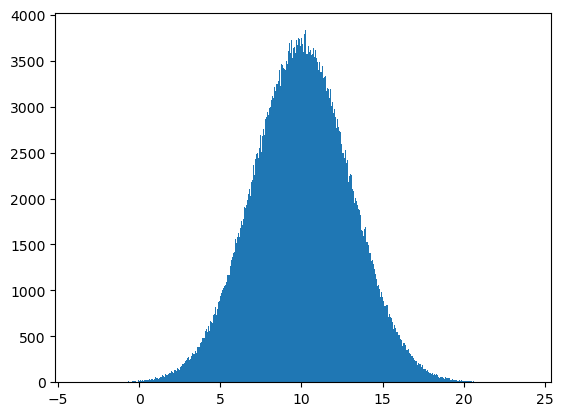

In [111]:
_,_,g = plt.hist(data, bins=1000)
g

### Slices

In [125]:
# 3 premières lettres
print(city[0:3])
print(city[:3])

Tou
Tou


In [128]:
# autres slices
print(city[3:6])
print(city[6:])
print(city[:])

lou
se
Toulouse


In [129]:
# 3 dernières lettres
city[-3:]

'use'

In [130]:
# mot à l'envers
city[::-1]

'esuoluoT'

### ndarray from numpy

In [131]:
data

array([ 7.59000516,  8.65398846,  5.88961687, ...,  5.65367248,
        6.84730724, 13.13523556])

In [132]:
type(data)

numpy.ndarray

In [133]:
data[:20]

array([ 7.59000516,  8.65398846,  5.88961687, 10.34751502,  8.23757392,
        8.12797394,  9.6508103 , 11.38337211,  8.11377451,  5.38620603,
       10.9188959 , 13.82944664,  9.73177591,  5.65801666, 10.12819926,
        8.7888822 ,  7.64845407,  9.56355555,  4.06621481,  9.86050525])

In [134]:
# prendre un échantillon tous les 10 valeurs et tracer l'histogramme

In [135]:
echantillon = data[::10]
print(len(echantillon))
print(echantillon.shape)

100000
(100000,)


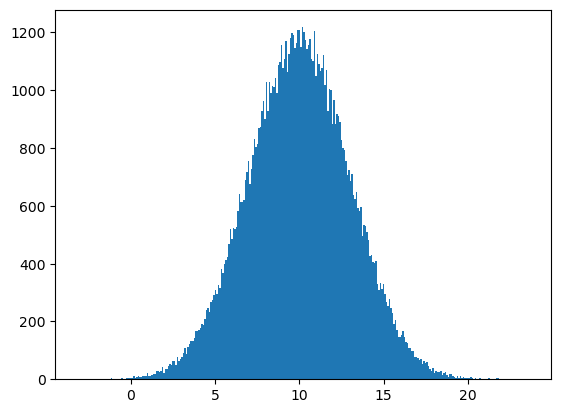

In [137]:
_ = plt.hist(echantillon, bins=300)

In [139]:
echantillon.flags # echantillon n'est pas une copie, c'est une vue

  C_CONTIGUOUS : False
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False

In [141]:
echantillon[1] = 9.9
echantillon

array([ 7.59000516,  9.9       , 12.38210241, ...,  5.34686472,
        5.24720897,  9.98029069])

In [142]:
data[:11]

array([ 7.59000516,  8.65398846,  5.88961687, 10.34751502,  8.23757392,
        8.12797394,  9.6508103 , 11.38337211,  8.11377451,  5.38620603,
        9.9       ])

In [144]:
data2d = data.reshape((1000,1000))
print(data2d.shape)
print(data2d.flags)

(1000, 1000)
  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False



In [145]:
data2d[3,4]

4.098208336139707

In [148]:
assert data2d[3,4] == data2d[3][4]

In [150]:
# row #3
data2d[3]

array([ 7.64526407,  8.71269688,  6.78012881, 12.15504753,  4.09820834,
       12.25699597, 10.73416028, 11.50068381,  8.10874651,  7.55482324,
       11.1091981 ,  9.02642582, 10.41151859, 10.6925263 ,  8.420619  ,
        9.95649353, 10.86091533,  8.52806377,  8.84518386,  9.12629719,
        8.44561239,  2.49427489,  8.75843214,  5.8948912 , 16.17729859,
       13.97796177, 13.49183428, 14.89601138,  9.55453366,  5.16596488,
       10.79338998, 10.51152974,  7.9786027 ,  5.79051405,  9.01430376,
        8.46953888, 11.01164322,  9.49599575, 11.93072979, 14.56418953,
       10.85052479,  7.16884889, 11.30930365, 10.35429784,  7.7928999 ,
        8.62022071,  9.75063422,  6.06353623, 12.69163161,  7.47571464,
        9.03098659, 12.5143702 , 12.43785109,  4.79792705,  6.86093557,
       12.42646199,  8.5223821 ,  4.71112989,  5.42515383, 10.70667521,
       11.4839479 ,  6.15248549, 15.0243717 ,  5.92294396, 13.15593071,
       12.43916737, 10.27209665,  7.46591695, 10.86425605, 11.82

In [151]:
# column #3
data2d[:,3]

array([10.34751502, 12.59790077, 10.04297043, 12.15504753, 11.84682361,
       11.30445768, 16.0644186 ,  8.53483531,  9.88911591, 15.37802983,
       11.24439964, 14.86121807, 11.10906084, 11.02798683, 11.69849423,
       15.11578734, 11.94296673,  6.03792492, 11.79351481, 10.17342702,
       11.03662964,  9.15566445, 10.21323737, 11.50633583,  7.64461619,
        6.88323562, 12.50213927,  9.48066394, 14.49495977, 12.50349876,
        5.65356097, 10.85652755, 12.84365362, 13.26350059, 10.96628817,
       11.10540228, 10.24099189,  5.82407385, 10.43719513,  6.07912904,
       15.01594539, 10.07278538,  7.01897085, 12.14856137, 10.90026687,
       15.81245147,  4.34839655, 15.92355086,  9.41354402, 10.13161525,
       11.65102867,  9.25045794, 10.22715602,  9.00811809,  6.0817025 ,
       10.70691855,  8.79484414, 12.58421633, 12.9042207 ,  6.27025579,
        7.44390871,  9.90704656,  8.91858254, 12.41020228, 10.12168923,
        7.56434838,  5.24103371,  4.21545853,  7.28452194, 12.17

In [152]:
# row #3 of transposed matrix == column #3
data2d.T[3]

array([10.34751502, 12.59790077, 10.04297043, 12.15504753, 11.84682361,
       11.30445768, 16.0644186 ,  8.53483531,  9.88911591, 15.37802983,
       11.24439964, 14.86121807, 11.10906084, 11.02798683, 11.69849423,
       15.11578734, 11.94296673,  6.03792492, 11.79351481, 10.17342702,
       11.03662964,  9.15566445, 10.21323737, 11.50633583,  7.64461619,
        6.88323562, 12.50213927,  9.48066394, 14.49495977, 12.50349876,
        5.65356097, 10.85652755, 12.84365362, 13.26350059, 10.96628817,
       11.10540228, 10.24099189,  5.82407385, 10.43719513,  6.07912904,
       15.01594539, 10.07278538,  7.01897085, 12.14856137, 10.90026687,
       15.81245147,  4.34839655, 15.92355086,  9.41354402, 10.13161525,
       11.65102867,  9.25045794, 10.22715602,  9.00811809,  6.0817025 ,
       10.70691855,  8.79484414, 12.58421633, 12.9042207 ,  6.27025579,
        7.44390871,  9.90704656,  8.91858254, 12.41020228, 10.12168923,
        7.56434838,  5.24103371,  4.21545853,  7.28452194, 12.17

In [155]:
# echantillon: n=10, n 1ères lignes et colonnes
n=10
echantillon2d = data2d[:n,:n]
print(echantillon2d)

[[ 7.59000516  8.65398846  5.88961687 10.34751502  8.23757392  8.12797394
   9.6508103  11.38337211  8.11377451  5.38620603]
 [ 6.20666729  8.77736879  6.91333867 12.59790077  9.6500635   6.31050168
   8.97620798  9.88810113 10.92406112 13.40124011]
 [ 8.75493948 14.60688404  8.66982432 10.04297043 10.3085897   7.91065053
   7.20386543 13.40701924 14.57950755 11.83518854]
 [ 7.64526407  8.71269688  6.78012881 12.15504753  4.09820834 12.25699597
  10.73416028 11.50068381  8.10874651  7.55482324]
 [ 8.5300757   8.60202248 12.07530477 11.84682361  6.70987041 13.91959746
   4.53791983  8.71721165 11.01246782 14.50782139]
 [11.15424133  8.22655891 12.42647002 11.30445768  2.41681057 12.14966413
  11.08205442  7.78726904 14.1099536  12.48064737]
 [11.9420828   8.15693583 11.74798719 16.0644186   6.20060809 13.0122616
  10.38315884 10.87925985  7.53751656  9.74328563]
 [ 9.95974895  9.68499213 12.51148641  8.53483531 11.77151626 12.00908689
   7.59795455  3.60947563 11.7517466  15.56885464]
 

In [156]:
# symétrique horizontale
echantillon2d[::-1]

array([[10.92760915,  7.89082126,  5.0421728 , 15.37802983, 11.746428  ,
         9.92588011, 11.77103709,  7.93431521,  9.74771524, 14.85383285],
       [ 7.99188049, 14.21450908,  6.07642554,  9.88911591,  7.34536473,
        11.49291223,  9.32497098, 13.87640424,  9.67200208,  9.25451175],
       [ 9.95974895,  9.68499213, 12.51148641,  8.53483531, 11.77151626,
        12.00908689,  7.59795455,  3.60947563, 11.7517466 , 15.56885464],
       [11.9420828 ,  8.15693583, 11.74798719, 16.0644186 ,  6.20060809,
        13.0122616 , 10.38315884, 10.87925985,  7.53751656,  9.74328563],
       [11.15424133,  8.22655891, 12.42647002, 11.30445768,  2.41681057,
        12.14966413, 11.08205442,  7.78726904, 14.1099536 , 12.48064737],
       [ 8.5300757 ,  8.60202248, 12.07530477, 11.84682361,  6.70987041,
        13.91959746,  4.53791983,  8.71721165, 11.01246782, 14.50782139],
       [ 7.64526407,  8.71269688,  6.78012881, 12.15504753,  4.09820834,
        12.25699597, 10.73416028, 11.50068381

In [158]:
# symétrique verticale
echantillon2d[:,::-1]

array([[ 5.38620603,  8.11377451, 11.38337211,  9.6508103 ,  8.12797394,
         8.23757392, 10.34751502,  5.88961687,  8.65398846,  7.59000516],
       [13.40124011, 10.92406112,  9.88810113,  8.97620798,  6.31050168,
         9.6500635 , 12.59790077,  6.91333867,  8.77736879,  6.20666729],
       [11.83518854, 14.57950755, 13.40701924,  7.20386543,  7.91065053,
        10.3085897 , 10.04297043,  8.66982432, 14.60688404,  8.75493948],
       [ 7.55482324,  8.10874651, 11.50068381, 10.73416028, 12.25699597,
         4.09820834, 12.15504753,  6.78012881,  8.71269688,  7.64526407],
       [14.50782139, 11.01246782,  8.71721165,  4.53791983, 13.91959746,
         6.70987041, 11.84682361, 12.07530477,  8.60202248,  8.5300757 ],
       [12.48064737, 14.1099536 ,  7.78726904, 11.08205442, 12.14966413,
         2.41681057, 11.30445768, 12.42647002,  8.22655891, 11.15424133],
       [ 9.74328563,  7.53751656, 10.87925985, 10.38315884, 13.0122616 ,
         6.20060809, 16.0644186 , 11.74798719

### Atelier carré magique